In [2]:
import numpy as np
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("FuelData.csv")
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2016,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.3,6.6,8.1,35,189
1,2016,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,12.7,9.1,11.1,25,254
2,2016,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6,AS9,Z,12.2,9.1,10.7,26,251
3,2016,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.4,8.6,10.7,26,249
4,2016,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,235


In [4]:
cdf = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head(8)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,9.3,6.6,8.1,189
1,3.5,6,12.7,9.1,11.1,254
2,3.5,6,12.2,9.1,10.7,251
3,3.5,6,12.4,8.6,10.7,249
4,3.5,6,11.9,7.7,10.0,235
5,3.5,6,8.0,7.5,7.7,180
6,2.4,4,9.6,6.6,8.3,196
7,3.5,6,11.2,7.5,9.6,226


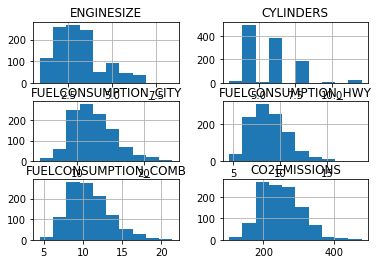

In [5]:
cdf = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.hist()
plt.show()

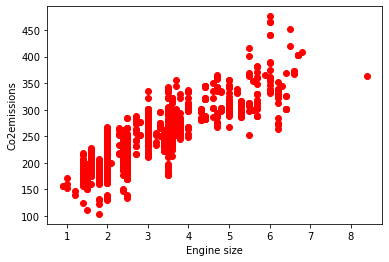

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color ='red')
plt.xlabel('Engine size')
plt.ylabel("Co2emissions")
plt.show()

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,9.3,6.6,8.1,189
1,3.5,6,12.7,9.1,11.1,254
2,3.5,6,12.2,9.1,10.7,251
3,3.5,6,12.4,8.6,10.7,249
4,3.5,6,11.9,7.7,10.0,235
...,...,...,...,...,...,...
1105,2.0,4,10.3,7.6,9.1,213
1106,2.5,5,12.5,9.2,11.0,254
1107,2.0,4,10.6,9.1,10.0,232
1108,2.0,4,10.8,9.5,10.2,239


In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


# simple linear

In [9]:
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)
print('Coefficient: ',regr.coef_)
print('Intercept: ',regr.intercept_)



Coefficient:  [[36.14862306]]
Intercept:  [135.58212229]


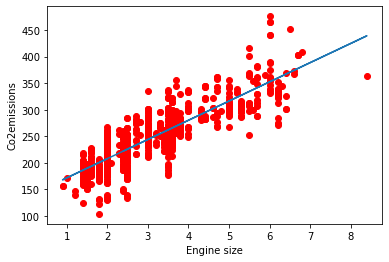

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color ='red')
plt.xlabel('Engine size')
plt.ylabel("Co2emissions")
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0])

In [11]:
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
preds = regr.predict(test_x)


print('MAE: %.2f'%np.absolute(np.mean(preds - test_y)))
print('MSE: %.2f'%np.mean((preds - test_y) ** 2))
print('R2_score: %.2f'%r2_score(test_y,preds))
print('Variance score: ',regr.score(test_x, test_y))

MAE: 0.17
MSE: 886.43
R2_score: 0.70
Variance score:  0.7021074732912691


# multiple linear


In [12]:
trin_x = np.asanyarray(train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]])
regr.fit(trin_x, train_y)
print('Coefficient: ',regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficient:  [[  6.02206114   5.73226724  16.10838839  14.74614681 -16.50220277]]
Intercept:  [45.86138862]


In [13]:
tst_x = np.asanyarray(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]])
tst_y = np.asanyarray(test[["CO2EMISSIONS"]])                    
predd = regr.predict(tst_x)

print('MAE: %.2f' %np.absolute(np.mean(predd - tst_y)))
print('MSE: %.2f' %np.mean((predd - tst_y) ** 2))
print('R2_score: %.2f '%r2_score(tst_y,predd))
print('Variance score: ',regr.score(tst_x, tst_y))

MAE: 1.20
MSE: 420.99
R2_score: 0.86 
Variance score:  0.8585236757151307


# polynomial regression

In [14]:
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
regr.fit(train_x_poly, train_y)
print('Coefficient: ',regr.coef_)
print('Intercept: ',regr.intercept_)

Coefficient:  [[ 0.00000000e+00  5.37948081e+01 -2.72417955e+00  5.34283676e-02]]
Intercept:  [109.24862673]


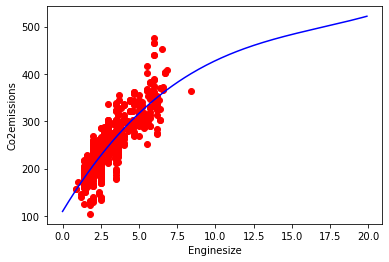

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')
XX = np.arange(0.0, 20.0, 0.1)
plt.xlabel('Enginesize')
plt.ylabel('Co2emissions')
plt.plot(XX, regr.coef_[0][1] * XX + regr.coef_[0][2] * np.power(XX, 2) + regr.coef_[0][3] * np.power(XX, 3) + regr.intercept_[0],'-b' )


In [16]:
test_x_poly = poly.fit_transform(test_x)
predictions = regr.predict(test_x_poly)

print('MAE:%.2f'%np.absolute(np.mean(predictions - test_y)))
print('MSE:%.2f'%np.mean((predictions - test_y) ** 2))
print('Variance score:%.2f'%regr.score(test_x_poly, test_y))
print('r2_score: ',r2_score(test_y,predictions))

MAE:0.13
MSE:833.97
Variance score:0.72
r2_score:  0.7197349469389147


# Non Linear Regr

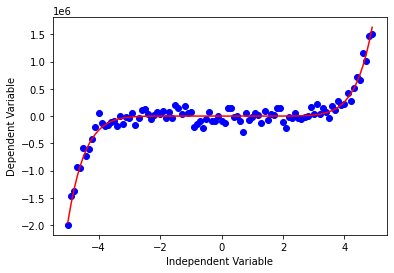

In [17]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.power(x,9)
y_noise = 100000*np.random.normal(size = x.size)
y_data = y + y_noise
plt.plot(x, y_data, 'bo')
plt.plot(x,y, color='red')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

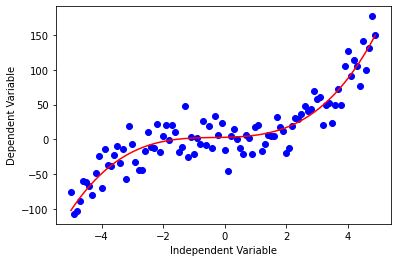

In [18]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = x**3 + x**2 + x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

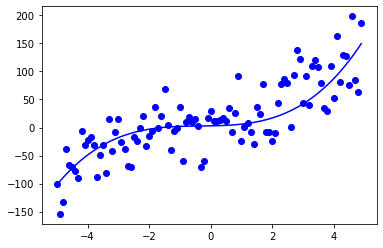

In [23]:
x = np.arange(-5.0, 5.0, 0.1)
Y = 1 - 4/(1+np.power(3, x-2))
y_noise =  40 * np.random.normal(size = x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, color='blue')
plt.show()


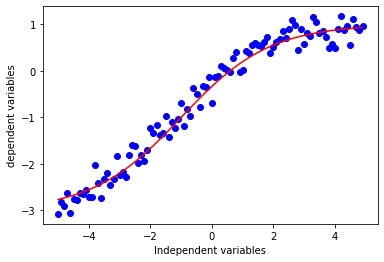

In [33]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1 - 4/(1 + np.power(2, x+1))
ynoise =  -0.2 * np.random.normal(size = x.size)
ydata = y + ynoise
plt.plot(x, ydata, 'bo')
plt.plot(x,y,color='red')
plt.xlabel('Independent variables')
plt.ylabel('dependent variables')
plt.show()